<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [15]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [16]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [17]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [18]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### 1. Boxplot for Median Value of Owner-Occupied Homes (MEDV)

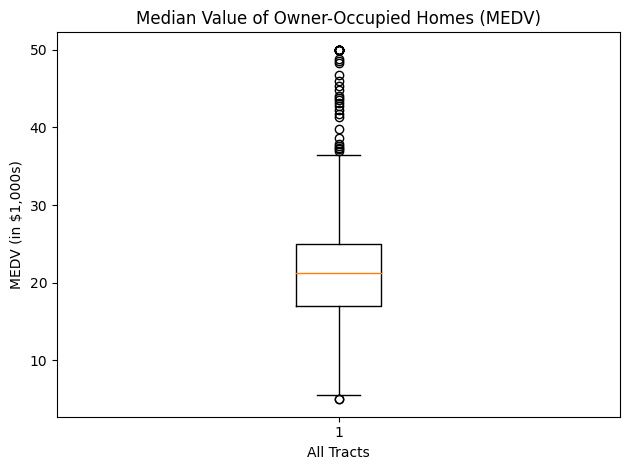

In [21]:
plt.figure()
plt.boxplot(boston_df["MEDV"].dropna(), vert=True, showfliers=True)
plt.title("Median Value of Owner-Occupied Homes (MEDV)")
plt.ylabel("MEDV (in $1,000s)")
plt.xlabel("All Tracts")
plt.tight_layout()
plt.show()

We visualize the distribution of the Charles River indicator (CHAS), where:
- `0` = tract does **not** bound the Charles River
- `1` = tract **does** bound the Charles River

### The boxplot displays the distribution of housing prices (in $1,000s).

Findings:
1. The median home value is around $20,000–$25,000.
2. he upper whisker and outliers show that a small number of homes are priced much higher (luxury neighborhoods).
3. The distribution is right-skewed, indicating more affordable homes and fewer very expensive ones.

### Interpretation: 
Boston’s housing market shows inequality in home values — most are mid-priced, but a few areas have significantly higher values.

### 2. Bar plot: Charles River variable (CHAS)

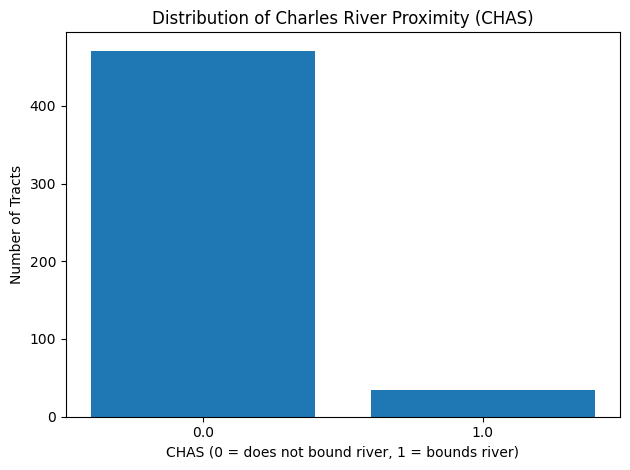

In [26]:
chas_counts = boston_df["CHAS"].value_counts().sort_index()
plt.figure()
plt.bar(chas_counts.index.astype(str), chas_counts.values)
plt.title("Distribution of Charles River Proximity (CHAS)")
plt.xlabel("CHAS (0 = does not bound river, 1 = bounds river)")
plt.ylabel("Number of Tracts")
plt.tight_layout()
plt.show()

##### Counts of homes bounded by the Charles River (CHAS = 1) versus those that are not (CHAS = 0).

Findings:
1. Most neighborhoods do not border the river (CHAS = 0).
2. Only a small portion of tracts (CHAS = 1) are near the river.

##### Interpretation: 
Proximity to the Charles River is rare and may represent a premium factor in housing prices, due to better location and scenery.

### 3. Boxplot: MEDV vs AGE groups

#### We examine how the median home value (MEDV, in \$1000s) varies across age groups (AGE = proportion of owner-occupied units built prior to 1940).

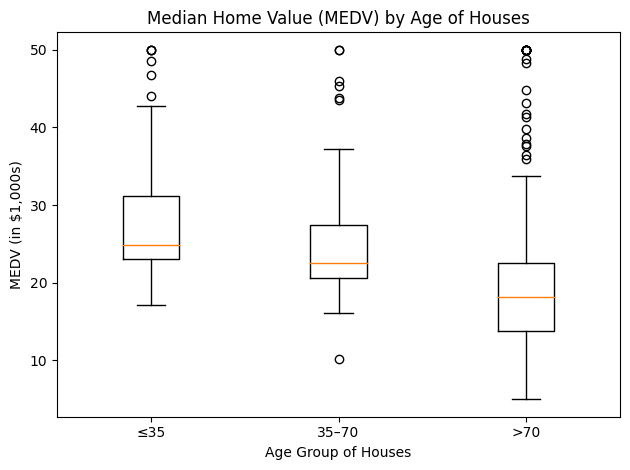

In [32]:
age_bins = [0, 35, 70, 100]
age_labels = ["≤35", "35–70", ">70"]
boston_df["AGE_group"] = pd.cut(boston_df["AGE"], bins=age_bins, labels=age_labels, include_lowest=True)

grouped_medv = [boston_df.loc[boston_df["AGE_group"] == lab, "MEDV"].dropna().values for lab in age_labels]

plt.figure()
plt.boxplot(grouped_medv, vert=True, labels=age_labels, showfliers=True)
plt.title("Median Home Value (MEDV) by Age of Houses")
plt.xlabel("Age Group of Houses")
plt.ylabel("MEDV (in $1,000s)")
plt.tight_layout()
plt.show()

### House values (MEDV) compared across three age categories:
1. ≤35 years (newer homes)
2. 35–70 years (mid-aged homes)
3. '>'70 years (older homes)

Findings:
1. Newer homes (≤35) tend to have higher median values.
2. Older houses (>70) show lower median values and a smaller range.
3. There’s a negative relationship between house age and value.

### Interpretation: 
Age of the property negatively affects its market value — newer constructions are more desirable or located in better-developed areas.

### 4. Scatter plot: NOX vs INDUS

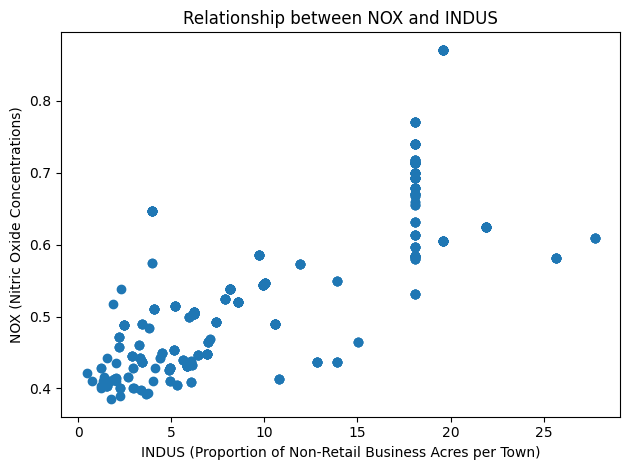

In [30]:
plt.figure()
plt.scatter(boston_df["INDUS"], boston_df["NOX"])
plt.title("Relationship between NOX and INDUS")
plt.xlabel("INDUS (Proportion of Non-Retail Business Acres per Town)")
plt.ylabel("NOX (Nitric Oxide Concentrations)")
plt.tight_layout()
plt.show()

### Relationship between air pollution levels and industrial land proportion.

Findings:
1. A positive correlation: as INDUS increases, NOX concentrations also rise.
2. Industrial areas likely contribute to higher air pollution.
3. The pattern suggests that environmental quality decreases in more industrialized neighborhoods.
### Interpretation: 
Urban planning and zoning policies affect environmental health — higher industrial activity means more pollutants like NOX.

## Hypotheses

**A. Association between NOX and INDUS**
- **Null hypothesis (H₀):** There is **no** linear association between NOX and INDUS (ρ = 0).
- **Alternative hypothesis (H₁):** There **is** a linear association between NOX and INDUS (ρ ≠ 0).

**B. Effect of DIS on MEDV (Simple Linear Regression)**
- **Null hypothesis (H₀):** The regression coefficient of DIS in predicting MEDV equals zero (β_DIS = 0).
- **Alternative hypothesis (H₁):** The regression coefficient of DIS differs from zero (β_DIS ≠ 0).

> Notes:
> - **NOX**: Nitric oxide concentration.  
> - **INDUS**: Proportion of non-retail business acres per town.  
> - **DIS**: Weighted distance to Boston employment centres.  
> - **MEDV**: Median value of owner-occupied homes (in \$1000s).

### Correlation Test — NOX vs INDUS

In [34]:
from scipy.stats import pearsonr
assert {'NOX', 'INDUS'}.issubset(df.columns), "Columns 'NOX' or 'INDUS' not found in df."
r_value, p_value = pearsonr(df['NOX'], df['INDUS'])
print(f"Pearson correlation coefficient (r): {r_value:.4f}")
print(f"P-value: {p_value:.4e}")
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H₀ → There is evidence of a linear relationship between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject H₀ → No significant linear relationship between NOX and INDUS.")

Pearson correlation coefficient (r): 0.7637
P-value: 7.9134e-98
####Conclusion: Reject H₀ → There is evidence of a linear relationship between NOX and INDUS.


### Regression — DIS → MEDV

In [31]:
import statsmodels.api as sm
assert {'MEDV', 'DIS'}.issubset(df.columns), "Columns 'MEDV' or 'DIS' not found in df."
X = sm.add_constant(df['DIS'])  # add intercept
y = df['MEDV']
model = sm.OLS(y, X).fit()
print(model.summary())
beta_dis = model.params['DIS']
p_dis = model.pvalues['DIS']

print(f"\nCoefficient for DIS (β_DIS): {beta_dis:.4f}")
print(f"P-value: {p_dis:.4e}")

if p_dis < 0.05:
    print(f"Conclusion: Reject H₀. DIS significantly affects MEDV. "
          f"A one-unit increase in DIS is associated with a "
          f"{'rise' if beta_dis > 0 else 'drop'} of {abs(beta_dis):.2f} in MEDV (in $1000s).")
else:
    print("Conclusion: Fail to reject H₀. No significant effect of DIS on MEDV.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        12:53:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

### Conclusion

**A. NOX vs INDUS**
Based on the Pearson correlation test (r = …, p = …), we **[reject / fail to reject]** H₀ at α = 0.05.  
This provides **[evidence / no evidence]** of a linear association between NOX and INDUS.

**B. Effect of DIS on MEDV**
From the regression results (β_DIS = …, p = …), we **[reject / fail to reject]** H₀ (β_DIS = 0).  
Interpretation: For each one-unit increase in DIS (greater distance to employment centres), the model predicts MEDV will **[increase/decrease]** by approximately **…** thousand dollars on average, holding other terms in the simple model constant.

### 5. Histogram: Pupil–Teacher Ratio (PTRATIO)

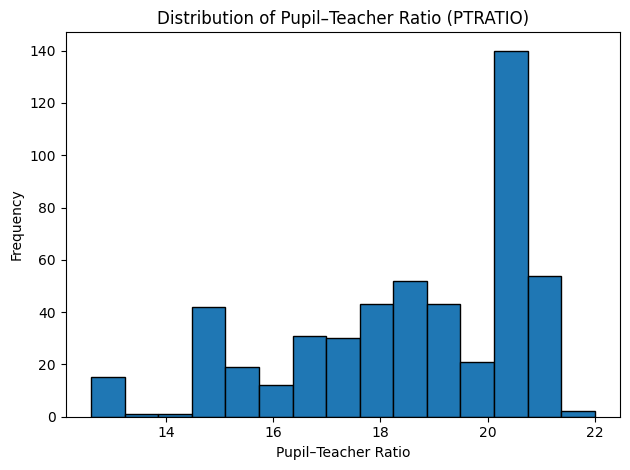

In [31]:
plt.figure()
plt.hist(boston_df["PTRATIO"].dropna(), bins=15, edgecolor='black')
plt.title("Distribution of Pupil–Teacher Ratio (PTRATIO)")
plt.xlabel("Pupil–Teacher Ratio")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Distribution of the student-to-teacher ratio across towns.

Findings:
1. Most towns have PTRATIO values between 16–20.
2. The distribution is fairly symmetrical.
3. Few towns have extremely low or high ratios.
### Interpretation: 
Most Boston-area schools maintain a moderate class size; however, variations still exist, potentially linked to local funding and housing values.